## TCC CBB

Desenvolvido por Ricardo e Thyago.

#### Objetivo: 

Este é uma das primeiras avaliações feitas com a utilização do PCA e do Tensorflow keras. Este código, possui duas avaliações exaustivas para a técnica. A primeira avaliação, consiste na análise de componentes para o tensorflow, com esta análise é possível identificar os componentes que, possuem as melhores assertividades. A segunda avaliação, é a de teste/treino, aplica-se o K-fold variando de 0.1 até 1.0, para os conjuntos de componentes. Toda a aplicação é feita sobre a base de dados Telco Customer Churn

### Import das bibiotecas

In [1]:
import random
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, model_selection, metrics
import pandas as pd

In [2]:
import time
import datetime

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#C:\\Users\\Thyago M\\Desktop\\ffmpeg.exe
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Thyago M\\Desktop\\ffmpeg.exe'

### BASE CUSTUMER CHURN

In [4]:
#WA_Fn-UseC_-Telco-Customer-Churn
def descarregaBaseDadosCustomer():

    df_WA = pd.read_csv(os.getcwd()+'\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

    df_WA_target = df_WA['Churn'].apply(converte_binario) 
    df_WA['PhoneService'] = df_WA['PhoneService'].apply(converte_binario)
    df_WA.drop('Churn', axis=1, inplace=True)
    df_WA.drop('customerID', axis=1, inplace=True)
    df_WA.drop('gender', axis=1, inplace=True)
    df_WA.drop('Partner', axis=1, inplace=True)
    df_WA.drop('Dependents', axis=1, inplace=True)
    df_WA.drop('tenure', axis=1, inplace=True)
    df_WA.drop('PaperlessBilling', axis=1, inplace=True)
    df_WA.drop('PaymentMethod', axis=1, inplace=True)
    df_WA.drop('Contract', axis=1, inplace=True)
    
    TotalCharges = []
    for x in df_WA['TotalCharges']:
        x = str(x)
        if('.' in x or ',' in x):
            x = x.replace(',','.')
            TotalCharges.append(x)

    #print(nova_lista1)
    x = 0
    MonthlyCharges = []
    for x in df_WA['MonthlyCharges']:
        x = str(x)
        if('.' in x or ',' in x):
            x = x.replace(',','.')
            MonthlyCharges.append(x)

    df_WA.drop(['TotalCharges', 'MonthlyCharges'], axis=1)

    TotalCharges_ = pd.Series(TotalCharges)
    MonthlyCharges_ = pd.Series(MonthlyCharges)

    df_WA['TotalCharges'] = TotalCharges_
    df_WA['MonthlyCharges'] = MonthlyCharges_
    
    #AGRUPAMENTO DE DADOS COM MAIS DE TRÊS TIPOS DE PARAMETROS
    
    internetServices = df_WA['InternetService'].value_counts()
    MultipleLines = df_WA['MultipleLines'].value_counts()   
    OnlineSecurity = df_WA['OnlineSecurity'].value_counts()
    OnlineBackup = df_WA['OnlineBackup'].value_counts()
    DeviceProtection = df_WA['DeviceProtection'].value_counts()
    TechSupport = df_WA['TechSupport'].value_counts()
    StreamingTV = df_WA['StreamingTV'].value_counts()
    StreamingMovies = df_WA['StreamingMovies'].value_counts()
    
    array_internetServices = []
    array_MultipleLines = []
    array_OnlineSecurity = []
    array_OnlineBackup =[]
    array_DeviceProtection = []
    array_TechSupport =[]
    array_StreamingTV = []
    array_StreamingMovies = []
    
    i = 0
    #---CAMPO INTERNETSERVICES------
    for index, val in internetServices.iteritems():
        array_internetServices.append(index)    
    for servico in array_internetServices:
        df_WA['InternetService'] = df_WA['InternetService'].replace(to_replace=servico, value=i)
        i = i+1
        
    #---CAMPO MULTIPLES LINES------
    
    for index, val in MultipleLines.iteritems():
        array_MultipleLines.append(index)
        i=0
    for multiple in array_MultipleLines:
        df_WA['MultipleLines'] = df_WA['MultipleLines'].replace(to_replace=multiple, value=i)
        i= i+1
     #-----campo OnlineSecurity
    for index, val in OnlineSecurity.iteritems():
        array_OnlineSecurity.append(index)
        i=0
    for online in array_OnlineSecurity:
        df_WA['OnlineSecurity'] = df_WA['OnlineSecurity'].replace(to_replace=online, value=i)
        i= i+1
        
    #--campo OnlineBackup
    for index, val in OnlineBackup.iteritems():
        array_OnlineBackup.append(index)
        i=0
    for backup in array_OnlineBackup:
        df_WA['OnlineBackup'] = df_WA['OnlineBackup'].replace(to_replace=backup, value=i)
        i= i+1
    #----campo DeviceProtection
    for index, val in DeviceProtection.iteritems():
        array_DeviceProtection.append(index)
        i=0
    for device in array_DeviceProtection:
        df_WA['DeviceProtection'] = df_WA['DeviceProtection'].replace(to_replace=device, value=i)
        i= i+1
    #---campo TechSupport
    for index, val in TechSupport.iteritems():
        array_TechSupport.append(index)
        i=0
    for support in array_TechSupport:
        df_WA['TechSupport'] = df_WA['TechSupport'].replace(to_replace=support, value=i)
        i= i+1
    #---StreamingTV
    for index, val in StreamingTV.iteritems():
        array_StreamingTV.append(index)
        i=0
    for streamingtv in array_StreamingTV:
        df_WA['StreamingTV'] = df_WA['StreamingTV'].replace(to_replace=streamingtv, value=i)
        i= i+1
    #---StreamingMovies
    for index, val in StreamingMovies.iteritems():
        array_StreamingMovies.append(index)
        i=0
    for streamingmovies in array_StreamingMovies:
        df_WA['StreamingMovies'] = df_WA['StreamingMovies'].replace(to_replace=streamingmovies, value=i)
        i= i+1
   
    
    df_WA.fillna(0, inplace=True)
    
    
    print(df_WA_target.value_counts())


    return df_WA, df_WA_target

## K-FOLD

#### K - Fold para a avaliação exaustiva baseado no número de componentes

In [5]:
def aplicaKFold(x_pca, df_weather_target):
    divisao = 0.2
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_weather_target, test_size=divisao)
   
    return (X_train, X_test, y_train, y_test)

#### K-fold para a avaliaçao exaustiva Treino/Teste da base de dados

In [6]:
def aplicaKFoldAlterado(x_pca, df_weather_target, divisao):
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_weather_target, test_size=divisao)
    return (X_train, X_test, y_train, y_test)

## Import do Tensorflow

In [7]:
#from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
#tensorflow.keras.models
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [8]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [9]:
def aplicaTensor(X_train, X_test, y_train, dim_input):
    model = Sequential()
    model.add(Dense(40, input_dim=dim_input, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=100)
    
    predictionsTensor = model.predict_proba(X_test)

    return predictionsTensor

## APLICAÇÃO DO TENSOR FLOW

### AVALIAÇÃO EXAUSTIVA DO TENSORFLOW - BASEADO NO NÚMERO DE COMPONENTES

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def converte_binario(palavra):
    if palavra=='Yes' or palavra==True:
        return 0
    elif palavra=='No' or palavra==False:
        return 1

### Scaled Data

In [12]:
#df_cell2cell, df_cell2cell_target
df_wa, df_wa_target = descarregaBaseDadosCustomer()
scaler = StandardScaler()
scaler.fit(df_wa)
scaled_data = scaler.transform(df_wa)

1    5174
0    1869
Name: Churn, dtype: int64


### Avaliação baseadda no número de compontes

In [13]:
convergencia = False
auc_total = []
auc_num_componentes = []
media_anterior = 0

tempo = datetime.datetime.now() 
ini = time.time()

for numComponentes in range(1, 13):
    auc_componente = []
    media_anterior = 0
    qtd_iguais = 0
    
    pca = PCA(n_components = numComponentes)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    
    convergencia = False
    print("Componente", numComponentes)
    
    while(not convergencia):
        
        X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = aplicaKFold(x_pca, df_wa_target)
        predictedprob = aplicaTensor(X_train_tensor, X_test_tensor, y_train_tensor, numComponentes)
        
        fpr, tpr, thresholds = roc_curve(y_test_tensor, predictedprob)
        roc_auc = auc(fpr, tpr)
        auc_componente.append(roc_auc)
        
        media_aucs = round(sum(auc_componente) / len(auc_componente), 2)
       
        if media_anterior == media_aucs:
            qtd_iguais = qtd_iguais + 1
        if qtd_iguais == 10:
            auc_num_componentes.append(media_aucs)
            auc_total.append(auc_componente)
            convergencia = True
           
        media_anterior = media_aucs
        print("Quantidade",qtd_iguais )
fim = time.time()
tempo2 = datetime.datetime.now() 

print("TEMPO", fim-ini)  
retorno_tempo = tempo2-tempo
print(retorno_tempo)

Componente 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
5634/5634 [==============================] - 10s 2ms/step - loss: 0.5912 - accuracy: 0.7306
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.5388 - accuracy: 0.7332
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.5049 - accuracy: 0.7464
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4953 - accuracy: 0.7522
Epoch 5/30
5634/5634 [==============================] - 0s 20us/step - loss: 0.4937 - accuracy: 0.7497
Epoch 6/30
5634/5634 [==============================] - 0s 19us/step - loss: 0.4929 - accuracy: 0.7519
Epoch 7/30
5634/5634 [==============================] - 0s 20us/step - loss: 0.4927 - accuracy: 0.7497
Epoch 8/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4918 - accuracy: 0.7499
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step 

5634/5634 [==============================] - 0s 21us/step - loss: 0.4866 - accuracy: 0.7572
Epoch 17/30
5634/5634 [==============================] - 0s 22us/step - loss: 0.4882 - accuracy: 0.7558
Epoch 18/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4891 - accuracy: 0.7531
Epoch 19/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4867 - accuracy: 0.7543
Epoch 20/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4867 - accuracy: 0.7567
Epoch 21/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4865 - accuracy: 0.7570
Epoch 22/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4871 - accuracy: 0.7513
Epoch 23/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4870 - accuracy: 0.7570
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4872 - accuracy: 0.7590
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 15us/step - loss: 0.4826 - accuracy: 0.7622
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4814 - accuracy: 0.7611
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4814 - accuracy: 0.7590
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4806 - accuracy: 0.7607
Epoch 8/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4800 - accuracy: 0.7591
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4798 - accuracy: 0.7614
Epoch 10/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4797 - accuracy: 0.7604
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4804 - accuracy: 0.7588
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4798 - accuracy: 0.7581
Epoch 13/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4

5634/5634 [==============================] - 0s 16us/step - loss: 0.4967 - accuracy: 0.7448
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4953 - accuracy: 0.7508
Epoch 24/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4957 - accuracy: 0.7492
Epoch 25/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4961 - accuracy: 0.7488
Epoch 26/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4951 - accuracy: 0.7490
Epoch 27/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4954 - accuracy: 0.7526
Epoch 28/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4958 - accuracy: 0.7508
Epoch 29/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4958 - accuracy: 0.7501
Epoch 30/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4957 - accuracy: 0.7465
Quantidade 4
Epoch 1/30
5634/5634 [==============================] - 0s 57us

5634/5634 [==============================] - 0s 16us/step - loss: 0.4962 - accuracy: 0.7439
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4964 - accuracy: 0.7494
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4959 - accuracy: 0.7492
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4960 - accuracy: 0.7519
Epoch 14/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4963 - accuracy: 0.7519
Epoch 15/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4960 - accuracy: 0.7474
Epoch 16/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4965 - accuracy: 0.7464
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4954 - accuracy: 0.7501
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4968 - accuracy: 0.7481
Epoch 19/30
5634/5634 [==============================] - 0s 15us/step - loss

5634/5634 [==============================] - 0s 15us/step - loss: 0.4837 - accuracy: 0.7588
Epoch 29/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4840 - accuracy: 0.7558
Epoch 30/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4844 - accuracy: 0.7552
Quantidade 9
Epoch 1/30
5634/5634 [==============================] - 0s 57us/step - loss: 0.5866 - accuracy: 0.7091
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.5272 - accuracy: 0.7352
Epoch 3/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4979 - accuracy: 0.7526
Epoch 4/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4902 - accuracy: 0.7543
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4898 - accuracy: 0.7554
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4887 - accuracy: 0.7563
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step 

5634/5634 [==============================] - 0s 15us/step - loss: 0.4775 - accuracy: 0.7655
Epoch 17/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4782 - accuracy: 0.7655
Epoch 18/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4771 - accuracy: 0.7655
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4772 - accuracy: 0.7678
Epoch 20/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4776 - accuracy: 0.7675
Epoch 21/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4767 - accuracy: 0.7698
Epoch 22/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4788 - accuracy: 0.7606
Epoch 23/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4786 - accuracy: 0.7650
Epoch 24/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4777 - accuracy: 0.7646
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4955 - accuracy: 0.7570
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4887 - accuracy: 0.7611
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4858 - accuracy: 0.7595
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4826 - accuracy: 0.7648
Epoch 8/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4823 - accuracy: 0.7646
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4825 - accuracy: 0.7583
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4804 - accuracy: 0.7652
Epoch 11/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4815 - accuracy: 0.7638
Epoch 12/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4810 - accuracy: 0.7623
Epoch 13/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4

5634/5634 [==============================] - 0s 15us/step - loss: 0.4800 - accuracy: 0.7643
Epoch 23/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4797 - accuracy: 0.7664
Epoch 24/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4810 - accuracy: 0.7668
Epoch 25/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4789 - accuracy: 0.7636
Epoch 26/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4790 - accuracy: 0.7655
Epoch 27/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4797 - accuracy: 0.7668
Epoch 28/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4789 - accuracy: 0.7655
Epoch 29/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4792 - accuracy: 0.7643
Epoch 30/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4792 - accuracy: 0.7636
Quantidade 5
Epoch 1/30
5634/5634 [==============================] - 0s 58us

5634/5634 [==============================] - 0s 16us/step - loss: 0.4840 - accuracy: 0.7606
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4850 - accuracy: 0.7577
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4843 - accuracy: 0.7556
Epoch 13/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4843 - accuracy: 0.7577
Epoch 14/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4835 - accuracy: 0.7558
Epoch 15/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4838 - accuracy: 0.7579
Epoch 16/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4833 - accuracy: 0.7599
Epoch 17/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4827 - accuracy: 0.7543
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4824 - accuracy: 0.7563
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4694 - accuracy: 0.7677
Epoch 29/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4695 - accuracy: 0.7677
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4698 - accuracy: 0.7698
Quantidade 10
Componente 3
Epoch 1/30
5634/5634 [==============================] - 0s 61us/step - loss: 0.6124 - accuracy: 0.6647
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.5194 - accuracy: 0.7464
Epoch 3/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.5043 - accuracy: 0.7522
Epoch 4/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4940 - accuracy: 0.7581
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4881 - accuracy: 0.7630
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4845 - accuracy: 0.7607
Epoch 7/30
5634/5634 [==============================] -

5634/5634 [==============================] - 0s 16us/step - loss: 0.4844 - accuracy: 0.7588
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4839 - accuracy: 0.7590
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4850 - accuracy: 0.7620
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4841 - accuracy: 0.7572
Epoch 20/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4835 - accuracy: 0.7597
Epoch 21/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4865 - accuracy: 0.7549
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4832 - accuracy: 0.7622
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4833 - accuracy: 0.7611
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4837 - accuracy: 0.7622
Epoch 25/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.5003 - accuracy: 0.7581
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4925 - accuracy: 0.7600
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4880 - accuracy: 0.7606
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4857 - accuracy: 0.7673
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4852 - accuracy: 0.7630
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4831 - accuracy: 0.7675
Epoch 10/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4815 - accuracy: 0.7666
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4822 - accuracy: 0.7662
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4808 - accuracy: 0.7675
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4

5634/5634 [==============================] - 0s 17us/step - loss: 0.4739 - accuracy: 0.7687
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4728 - accuracy: 0.7700
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4729 - accuracy: 0.7648
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4716 - accuracy: 0.7666
Epoch 26/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4730 - accuracy: 0.7677
Epoch 27/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4712 - accuracy: 0.7675
Epoch 28/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4716 - accuracy: 0.7687
Epoch 29/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4716 - accuracy: 0.7712
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4729 - accuracy: 0.7655
Quantidade 5
Epoch 1/30
5634/5634 [==============================] - 0s 59us

5634/5634 [==============================] - 0s 16us/step - loss: 0.4731 - accuracy: 0.7693
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4731 - accuracy: 0.7723
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4721 - accuracy: 0.7666
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4745 - accuracy: 0.7668
Epoch 14/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4714 - accuracy: 0.7696
Epoch 15/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4726 - accuracy: 0.7643
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4713 - accuracy: 0.7677
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4705 - accuracy: 0.7698
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4708 - accuracy: 0.7650
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4785 - accuracy: 0.7662
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4795 - accuracy: 0.7629
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4781 - accuracy: 0.7650
Quantidade 10
Componente 4
Epoch 1/30
5634/5634 [==============================] - 0s 65us/step - loss: 0.5692 - accuracy: 0.7112
Epoch 2/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.5228 - accuracy: 0.7469
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.5056 - accuracy: 0.7513
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4959 - accuracy: 0.7575
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4902 - accuracy: 0.7559
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4847 - accuracy: 0.7623
Epoch 7/30
5634/5634 [==============================] -

5634/5634 [==============================] - 0s 16us/step - loss: 0.4798 - accuracy: 0.7613
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4791 - accuracy: 0.7593
Epoch 18/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4771 - accuracy: 0.7629
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4772 - accuracy: 0.7646
Epoch 20/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4766 - accuracy: 0.7620
Epoch 21/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4775 - accuracy: 0.7613
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4776 - accuracy: 0.7623
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4771 - accuracy: 0.7606
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4760 - accuracy: 0.7604
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.5012 - accuracy: 0.7487
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4939 - accuracy: 0.7531
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4916 - accuracy: 0.7529
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4866 - accuracy: 0.7586
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4844 - accuracy: 0.7609
Epoch 9/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4821 - accuracy: 0.7581
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4813 - accuracy: 0.7600
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4791 - accuracy: 0.7599
Epoch 12/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4788 - accuracy: 0.7599
Epoch 13/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4

5634/5634 [==============================] - 0s 17us/step - loss: 0.4657 - accuracy: 0.7693
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4661 - accuracy: 0.7705
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4643 - accuracy: 0.7721
Epoch 25/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4653 - accuracy: 0.7723
Epoch 26/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4646 - accuracy: 0.7707
Epoch 27/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4646 - accuracy: 0.7701
Epoch 28/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4647 - accuracy: 0.7723
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4649 - accuracy: 0.7696
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4643 - accuracy: 0.7710
Quantidade 5
Epoch 1/30
5634/5634 [==============================] - 0s 58us

5634/5634 [==============================] - 0s 16us/step - loss: 0.4856 - accuracy: 0.7570
Epoch 11/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4838 - accuracy: 0.7599
Epoch 12/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4837 - accuracy: 0.7623
Epoch 13/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4835 - accuracy: 0.7568
Epoch 14/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4833 - accuracy: 0.7602
Epoch 15/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4823 - accuracy: 0.7597
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4830 - accuracy: 0.7622
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4815 - accuracy: 0.7597
Epoch 18/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4812 - accuracy: 0.7613
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4786 - accuracy: 0.7620
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4773 - accuracy: 0.7638
Epoch 30/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4778 - accuracy: 0.7630
Quantidade 10
Componente 5
Epoch 1/30
5634/5634 [==============================] - 0s 60us/step - loss: 0.5825 - accuracy: 0.6890
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.5237 - accuracy: 0.7396
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.5109 - accuracy: 0.7476
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.5028 - accuracy: 0.7543
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4975 - accuracy: 0.7535
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4940 - accuracy: 0.7520
Epoch 7/30
5634/5634 [==============================] -

5634/5634 [==============================] - 0s 16us/step - loss: 0.4741 - accuracy: 0.7723
Epoch 17/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4740 - accuracy: 0.7671
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4731 - accuracy: 0.7712
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4722 - accuracy: 0.7725
Epoch 20/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4743 - accuracy: 0.7714
Epoch 21/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4719 - accuracy: 0.7710
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4730 - accuracy: 0.7691
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4724 - accuracy: 0.7737
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4709 - accuracy: 0.7705
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.5003 - accuracy: 0.7561
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4951 - accuracy: 0.7618
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4904 - accuracy: 0.7614
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4872 - accuracy: 0.7607
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4856 - accuracy: 0.7634
Epoch 9/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4825 - accuracy: 0.7638
Epoch 10/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4812 - accuracy: 0.7696
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4787 - accuracy: 0.7613
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4787 - accuracy: 0.7650
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4

5634/5634 [==============================] - 0s 16us/step - loss: 0.4713 - accuracy: 0.7666
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4697 - accuracy: 0.7691
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4693 - accuracy: 0.7698
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4704 - accuracy: 0.7709
Epoch 26/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4705 - accuracy: 0.7666
Epoch 27/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4689 - accuracy: 0.7705
Epoch 28/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4683 - accuracy: 0.7682
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4681 - accuracy: 0.7678
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4684 - accuracy: 0.7682
Quantidade 7
Epoch 1/30
5634/5634 [==============================] - 0s 61us

5634/5634 [==============================] - 0s 16us/step - loss: 0.4805 - accuracy: 0.7641
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4796 - accuracy: 0.7662
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4795 - accuracy: 0.7657
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4782 - accuracy: 0.7661
Epoch 14/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4770 - accuracy: 0.7675
Epoch 15/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4773 - accuracy: 0.7643
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4774 - accuracy: 0.7641
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4754 - accuracy: 0.7661
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4757 - accuracy: 0.7664
Epoch 19/30
5634/5634 [==============================] - 0s 15us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4683 - accuracy: 0.7726
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4678 - accuracy: 0.7744
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4693 - accuracy: 0.7712
Quantidade 0
Epoch 1/30
5634/5634 [==============================] - 0s 57us/step - loss: 0.5463 - accuracy: 0.7387
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.5018 - accuracy: 0.7545
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4907 - accuracy: 0.7593
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4857 - accuracy: 0.7639
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4809 - accuracy: 0.7664
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4803 - accuracy: 0.7662
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step 

5634/5634 [==============================] - 0s 17us/step - loss: 0.4705 - accuracy: 0.7701
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4698 - accuracy: 0.7709
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4700 - accuracy: 0.7705
Epoch 19/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4700 - accuracy: 0.7701
Epoch 20/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4693 - accuracy: 0.7709
Epoch 21/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4696 - accuracy: 0.7714
Epoch 22/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4687 - accuracy: 0.7716
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4674 - accuracy: 0.7710
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4675 - accuracy: 0.7700
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4878 - accuracy: 0.7609
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4846 - accuracy: 0.7648
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4823 - accuracy: 0.7636
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4807 - accuracy: 0.7623
Epoch 8/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4793 - accuracy: 0.7630
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4790 - accuracy: 0.7627
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4768 - accuracy: 0.7630
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4766 - accuracy: 0.7648
Epoch 12/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4755 - accuracy: 0.7636
Epoch 13/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4

5634/5634 [==============================] - 0s 21us/step - loss: 0.4693 - accuracy: 0.7726
Epoch 23/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4699 - accuracy: 0.7698
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4701 - accuracy: 0.7684
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4690 - accuracy: 0.7733
Epoch 26/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4694 - accuracy: 0.7744
Epoch 27/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4680 - accuracy: 0.7741
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4690 - accuracy: 0.7714
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4694 - accuracy: 0.7726
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4683 - accuracy: 0.7739
Quantidade 7
Epoch 1/30
5634/5634 [==============================] - 0s 58us

5634/5634 [==============================] - 0s 22us/step - loss: 0.4706 - accuracy: 0.7707
Epoch 11/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.4705 - accuracy: 0.7705
Epoch 12/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.4695 - accuracy: 0.7700
Epoch 13/30
5634/5634 [==============================] - 0s 19us/step - loss: 0.4686 - accuracy: 0.7691
Epoch 14/30
5634/5634 [==============================] - 0s 20us/step - loss: 0.4669 - accuracy: 0.7730
Epoch 15/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4674 - accuracy: 0.7710
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4670 - accuracy: 0.7710
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4671 - accuracy: 0.7705
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4662 - accuracy: 0.7701
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 18us/step - loss: 0.4614 - accuracy: 0.7732
Epoch 29/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4612 - accuracy: 0.7744
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4609 - accuracy: 0.7744
Quantidade 0
Epoch 1/30
5634/5634 [==============================] - 0s 62us/step - loss: 0.5936 - accuracy: 0.6629
Epoch 2/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.5015 - accuracy: 0.7504
Epoch 3/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4844 - accuracy: 0.7671
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4761 - accuracy: 0.7716
Epoch 5/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4727 - accuracy: 0.7748
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4689 - accuracy: 0.7776
Epoch 7/30
5634/5634 [==============================] - 0s 17us/step 

5634/5634 [==============================] - ETA: 0s - loss: 0.4812 - accuracy: 0.76 - 0s 18us/step - loss: 0.4653 - accuracy: 0.7726
Epoch 17/30
5634/5634 [==============================] - ETA: 0s - loss: 0.4701 - accuracy: 0.77 - 0s 17us/step - loss: 0.4634 - accuracy: 0.7755
Epoch 18/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4625 - accuracy: 0.7780
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4640 - accuracy: 0.7721
Epoch 20/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4624 - accuracy: 0.7760
Epoch 21/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4618 - accuracy: 0.7726
Epoch 22/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4632 - accuracy: 0.7725
Epoch 23/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4622 - accuracy: 0.7735
Epoch 24/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4606 - accuracy:

5634/5634 [==============================] - 0s 16us/step - loss: 0.4805 - accuracy: 0.7716
Epoch 4/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4765 - accuracy: 0.7737
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4740 - accuracy: 0.7716
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4723 - accuracy: 0.7756
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4702 - accuracy: 0.7730
Epoch 8/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4683 - accuracy: 0.7733
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4679 - accuracy: 0.7767
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4664 - accuracy: 0.7765
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4661 - accuracy: 0.7742
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.46

5634/5634 [==============================] - 0s 16us/step - loss: 0.4700 - accuracy: 0.7717
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4699 - accuracy: 0.7694
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4694 - accuracy: 0.7721
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4692 - accuracy: 0.7725
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4698 - accuracy: 0.7719
Epoch 26/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4695 - accuracy: 0.7709
Epoch 27/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4687 - accuracy: 0.7694
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4696 - accuracy: 0.7684
Epoch 29/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4679 - accuracy: 0.7693
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4706 - accuracy: 0.7701
Epoch 10/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.4691 - accuracy: 0.7691
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4680 - accuracy: 0.7726
Epoch 12/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4670 - accuracy: 0.7717
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4673 - accuracy: 0.7712
Epoch 14/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4667 - accuracy: 0.7737
Epoch 15/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4654 - accuracy: 0.7705
Epoch 16/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4657 - accuracy: 0.7705
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4652 - accuracy: 0.7726
Epoch 18/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4678 - accuracy: 0.7730
Epoch 28/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4659 - accuracy: 0.7744
Epoch 29/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4675 - accuracy: 0.7723
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4669 - accuracy: 0.7737
Quantidade 0
Epoch 1/30
5634/5634 [==============================] - 0s 60us/step - loss: 0.5449 - accuracy: 0.7284
Epoch 2/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.5007 - accuracy: 0.7549
Epoch 3/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4893 - accuracy: 0.7607
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4841 - accuracy: 0.7694
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4813 - accuracy: 0.7680
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step

5634/5634 [==============================] - 0s 17us/step - loss: 0.4686 - accuracy: 0.7760
Epoch 16/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4669 - accuracy: 0.7725
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4664 - accuracy: 0.7749
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4667 - accuracy: 0.7721
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4660 - accuracy: 0.7749
Epoch 20/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4661 - accuracy: 0.7709
Epoch 21/30
5634/5634 [==============================] - 0s 19us/step - loss: 0.4656 - accuracy: 0.7723
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4645 - accuracy: 0.7732
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4632 - accuracy: 0.7774
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4839 - accuracy: 0.7673
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4796 - accuracy: 0.7693
Epoch 5/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4771 - accuracy: 0.7709
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4758 - accuracy: 0.7694
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4747 - accuracy: 0.7698
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4734 - accuracy: 0.7733
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4719 - accuracy: 0.7709
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4720 - accuracy: 0.7705
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4707 - accuracy: 0.7691
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.46

5634/5634 [==============================] - 0s 17us/step - loss: 0.4695 - accuracy: 0.7705
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4686 - accuracy: 0.7694
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4680 - accuracy: 0.7716
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4708 - accuracy: 0.7666
Epoch 25/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4676 - accuracy: 0.7714
Epoch 26/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4678 - accuracy: 0.7707
Epoch 27/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4670 - accuracy: 0.7694
Epoch 28/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4666 - accuracy: 0.7730
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4663 - accuracy: 0.7719
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4758 - accuracy: 0.7710
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4760 - accuracy: 0.7689
Epoch 11/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4738 - accuracy: 0.7712
Epoch 12/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4736 - accuracy: 0.7693
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4720 - accuracy: 0.7712
Epoch 14/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4727 - accuracy: 0.7719
Epoch 15/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4711 - accuracy: 0.7714
Epoch 16/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4706 - accuracy: 0.7735
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4706 - accuracy: 0.7684
Epoch 18/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4611 - accuracy: 0.7760
Epoch 28/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4611 - accuracy: 0.7725
Epoch 29/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4611 - accuracy: 0.7730
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4594 - accuracy: 0.7742
Quantidade 0
Epoch 1/30
5634/5634 [==============================] - 0s 59us/step - loss: 0.5673 - accuracy: 0.7080
Epoch 2/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.5042 - accuracy: 0.7570
Epoch 3/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4890 - accuracy: 0.7650
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4846 - accuracy: 0.7691
Epoch 5/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4827 - accuracy: 0.7685
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step

5634/5634 [==============================] - 0s 17us/step - loss: 0.4711 - accuracy: 0.7730
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4702 - accuracy: 0.7730
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4693 - accuracy: 0.7710
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4720 - accuracy: 0.7696
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4682 - accuracy: 0.7705
Epoch 20/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4681 - accuracy: 0.7716
Epoch 21/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4672 - accuracy: 0.7739
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4680 - accuracy: 0.7728
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4660 - accuracy: 0.7739
Epoch 24/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4876 - accuracy: 0.7700
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4834 - accuracy: 0.7664
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4798 - accuracy: 0.7677
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4771 - accuracy: 0.7682
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4765 - accuracy: 0.7687
Epoch 8/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4753 - accuracy: 0.7682
Epoch 9/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4736 - accuracy: 0.7707
Epoch 10/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4725 - accuracy: 0.7698
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4720 - accuracy: 0.7687
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.47

5634/5634 [==============================] - 0s 17us/step - loss: 0.4642 - accuracy: 0.7746
Epoch 22/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4640 - accuracy: 0.7714
Epoch 23/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4640 - accuracy: 0.7732
Epoch 24/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4637 - accuracy: 0.7735
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4619 - accuracy: 0.7739
Epoch 26/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4621 - accuracy: 0.7744
Epoch 27/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4612 - accuracy: 0.7760
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4614 - accuracy: 0.7758
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4612 - accuracy: 0.7764
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4703 - accuracy: 0.7714
Epoch 10/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4687 - accuracy: 0.7712
Epoch 11/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4678 - accuracy: 0.7709
Epoch 12/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4673 - accuracy: 0.7696
Epoch 13/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4676 - accuracy: 0.7707
Epoch 14/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4664 - accuracy: 0.7689
Epoch 15/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4652 - accuracy: 0.7728
Epoch 16/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4641 - accuracy: 0.7746
Epoch 17/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4638 - accuracy: 0.7728
Epoch 18/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4605 - accuracy: 0.7739
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4596 - accuracy: 0.7788
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4595 - accuracy: 0.7774
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4593 - accuracy: 0.7787
Quantidade 9
Epoch 1/30
5634/5634 [==============================] - 0s 59us/step - loss: 0.5637 - accuracy: 0.7173
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4987 - accuracy: 0.7606
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4875 - accuracy: 0.7652
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4817 - accuracy: 0.7693
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4801 - accuracy: 0.7705
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step

5634/5634 [==============================] - 0s 17us/step - loss: 0.4695 - accuracy: 0.7746
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4681 - accuracy: 0.7728
Epoch 17/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4678 - accuracy: 0.7721
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4669 - accuracy: 0.7749
Epoch 19/30
5634/5634 [==============================] - 0s 19us/step - loss: 0.4662 - accuracy: 0.7725
Epoch 20/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4655 - accuracy: 0.7749
Epoch 21/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4657 - accuracy: 0.7758
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4647 - accuracy: 0.7744
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4633 - accuracy: 0.7755
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 18us/step - loss: 0.4893 - accuracy: 0.7636
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4833 - accuracy: 0.7677
Epoch 5/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4790 - accuracy: 0.7703
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4774 - accuracy: 0.7717
Epoch 7/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4735 - accuracy: 0.7696
Epoch 8/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4724 - accuracy: 0.7732
Epoch 9/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4722 - accuracy: 0.7716
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4699 - accuracy: 0.7716
Epoch 11/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4685 - accuracy: 0.7728
Epoch 12/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.46

5634/5634 [==============================] - 0s 18us/step - loss: 0.4656 - accuracy: 0.7730
Epoch 22/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4656 - accuracy: 0.7723
Epoch 23/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4659 - accuracy: 0.7716
Epoch 24/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4650 - accuracy: 0.7703
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4642 - accuracy: 0.7728
Epoch 26/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4634 - accuracy: 0.7746
Epoch 27/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4644 - accuracy: 0.7717
Epoch 28/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4621 - accuracy: 0.7725
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4627 - accuracy: 0.7717
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 24us/step - loss: 0.4710 - accuracy: 0.7785
Epoch 10/30
5634/5634 [==============================] - 0s 24us/step - loss: 0.4687 - accuracy: 0.7749
Epoch 11/30
5634/5634 [==============================] - 0s 24us/step - loss: 0.4684 - accuracy: 0.7764
Epoch 12/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.4684 - accuracy: 0.7719
Epoch 13/30
5634/5634 [==============================] - 0s 20us/step - loss: 0.4675 - accuracy: 0.7755
Epoch 14/30
5634/5634 [==============================] - 0s 19us/step - loss: 0.4657 - accuracy: 0.7762
Epoch 15/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4648 - accuracy: 0.7749
Epoch 16/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.4638 - accuracy: 0.7749
Epoch 17/30
5634/5634 [==============================] - 0s 23us/step - loss: 0.4648 - accuracy: 0.7742
Epoch 18/30
5634/5634 [==============================] - 0s 21us/step - loss

5634/5634 [==============================] - 0s 23us/step - loss: 0.4590 - accuracy: 0.7812
Epoch 28/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.4581 - accuracy: 0.7787
Epoch 29/30
5634/5634 [==============================] - 0s 20us/step - loss: 0.4580 - accuracy: 0.7822 0s - loss: 0.4605 - accuracy: 0.
Epoch 30/30
5634/5634 [==============================] - 0s 20us/step - loss: 0.4584 - accuracy: 0.7804
Quantidade 9
Epoch 1/30
5634/5634 [==============================] - 0s 77us/step - loss: 0.5812 - accuracy: 0.7018
Epoch 2/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.5014 - accuracy: 0.7558
Epoch 3/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4857 - accuracy: 0.7657
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4790 - accuracy: 0.7680
Epoch 5/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4756 - accuracy: 0.7709
Epoch 6/30
5634/5634 [=============

5634/5634 [==============================] - 0s 17us/step - loss: 0.4631 - accuracy: 0.7767
Epoch 16/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4614 - accuracy: 0.7787
Epoch 17/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4609 - accuracy: 0.7776
Epoch 18/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4600 - accuracy: 0.7790
Epoch 19/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4601 - accuracy: 0.7760
Epoch 20/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4595 - accuracy: 0.7755
Epoch 21/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4588 - accuracy: 0.7780
Epoch 22/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4579 - accuracy: 0.7776
Epoch 23/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4579 - accuracy: 0.7797
Epoch 24/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 21us/step - loss: 0.4895 - accuracy: 0.7632
Epoch 4/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.4816 - accuracy: 0.7698
Epoch 5/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.4785 - accuracy: 0.7696
Epoch 6/30
5634/5634 [==============================] - 0s 20us/step - loss: 0.4757 - accuracy: 0.7689
Epoch 7/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4753 - accuracy: 0.7707
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4713 - accuracy: 0.7721
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4704 - accuracy: 0.7733
Epoch 10/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4689 - accuracy: 0.7746
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4685 - accuracy: 0.7737
Epoch 12/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.46

5634/5634 [==============================] - 0s 17us/step - loss: 0.4619 - accuracy: 0.7780
Epoch 22/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4611 - accuracy: 0.7721
Epoch 23/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4610 - accuracy: 0.7737
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4604 - accuracy: 0.7753
Epoch 25/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4596 - accuracy: 0.7765
Epoch 26/30
5634/5634 [==============================] - 0s 19us/step - loss: 0.4593 - accuracy: 0.7742
Epoch 27/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4583 - accuracy: 0.7776
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4593 - accuracy: 0.7772
Epoch 29/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4592 - accuracy: 0.7723
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 18us/step - loss: 0.4708 - accuracy: 0.7723
Epoch 10/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4703 - accuracy: 0.7741
Epoch 11/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4695 - accuracy: 0.7723
Epoch 12/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4686 - accuracy: 0.7700
Epoch 13/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4680 - accuracy: 0.7712
Epoch 14/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4666 - accuracy: 0.7725
Epoch 15/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4669 - accuracy: 0.7739
Epoch 16/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4654 - accuracy: 0.7732
Epoch 17/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4671 - accuracy: 0.7687
Epoch 18/30
5634/5634 [==============================] - 0s 17us/step - loss

5634/5634 [==============================] - 0s 18us/step - loss: 0.4493 - accuracy: 0.7804
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4481 - accuracy: 0.7817
Epoch 29/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4503 - accuracy: 0.7788
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4476 - accuracy: 0.7796
Quantidade 0
Epoch 1/30
5634/5634 [==============================] - 0s 61us/step - loss: 0.5555 - accuracy: 0.7283
Epoch 2/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4943 - accuracy: 0.7685
Epoch 3/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4787 - accuracy: 0.7753
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4742 - accuracy: 0.7721
Epoch 5/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4726 - accuracy: 0.7762
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step

5634/5634 [==============================] - 0s 16us/step - loss: 0.4588 - accuracy: 0.7755
Epoch 16/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4581 - accuracy: 0.7792
Epoch 17/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4578 - accuracy: 0.7769
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4579 - accuracy: 0.7783
Epoch 19/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4574 - accuracy: 0.7749
Epoch 20/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4566 - accuracy: 0.7787
Epoch 21/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4557 - accuracy: 0.7790
Epoch 22/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4554 - accuracy: 0.7790
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4547 - accuracy: 0.7787
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4771 - accuracy: 0.7717
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4725 - accuracy: 0.7741
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4698 - accuracy: 0.7730
Epoch 6/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4691 - accuracy: 0.7771
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4661 - accuracy: 0.7772
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4664 - accuracy: 0.7742
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4642 - accuracy: 0.7737
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4626 - accuracy: 0.7764
Epoch 11/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4637 - accuracy: 0.7742
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.46

5634/5634 [==============================] - 0s 17us/step - loss: 0.4602 - accuracy: 0.7760
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4605 - accuracy: 0.7748
Epoch 23/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4587 - accuracy: 0.7781
Epoch 24/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4595 - accuracy: 0.7778
Epoch 25/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4584 - accuracy: 0.7803
Epoch 26/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4588 - accuracy: 0.7794
Epoch 27/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4587 - accuracy: 0.7767
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4578 - accuracy: 0.7787
Epoch 29/30
5634/5634 [==============================] - 0s 22us/step - loss: 0.4571 - accuracy: 0.7790
Epoch 30/30
5634/5634 [==============================] - 0s 22us/step - loss

5634/5634 [==============================] - 0s 18us/step - loss: 0.4656 - accuracy: 0.7765
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4650 - accuracy: 0.7749
Epoch 11/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4635 - accuracy: 0.7746
Epoch 12/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4632 - accuracy: 0.7751
Epoch 13/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4635 - accuracy: 0.7751
Epoch 14/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4628 - accuracy: 0.7769
Epoch 15/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4625 - accuracy: 0.7781
Epoch 16/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4616 - accuracy: 0.7755
Epoch 17/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4621 - accuracy: 0.7732
Epoch 18/30
5634/5634 [==============================] - 0s 18us/step - loss

5634/5634 [==============================] - 0s 18us/step - loss: 0.4580 - accuracy: 0.7797
Epoch 28/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4582 - accuracy: 0.7797
Epoch 29/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4566 - accuracy: 0.7785
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4568 - accuracy: 0.7796
Quantidade 8
Epoch 1/30
5634/5634 [==============================] - 0s 65us/step - loss: 0.5646 - accuracy: 0.7174
Epoch 2/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.5045 - accuracy: 0.7474
Epoch 3/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4848 - accuracy: 0.7668
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4778 - accuracy: 0.7673
Epoch 5/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4750 - accuracy: 0.7723
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step

### Gráfico da assertividade em cada componentes

In [14]:
import seaborn as sns
import numpy as np
df = pd.DataFrame()
df['Media'] = auc_num_componentes
df['Num Componentes'] = np.arange(1, 13)

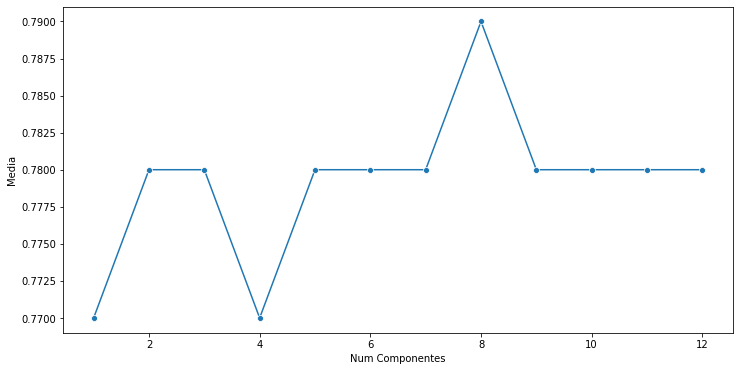

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))  
g = sns.lineplot(y='Media', x = 'Num Componentes', data=df, marker = 'o')
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
plt.savefig('media_pca_componentes_tensorflow-custumer.png')

### CUrva roc tensorflow

In [17]:
divisao = 0.2
dim_inputu = 8
pca_mlp = PCA(n_components = 8)
pca_mlp.fit(scaled_data)
x_pca = pca_mlp.transform(scaled_data)

X_train, X_test, y_train, y_test = aplicaKFoldAlterado(x_pca, df_wa_target, divisao)
predictedprob = aplicaTensor(X_train, X_test, y_train, dim_inputu)

fpr, tpr, thresholds = roc_curve(y_test, predictedprob)
roc_auc= auc(fpr, tpr)

Epoch 1/30
5634/5634 [==============================] - 0s 84us/step - loss: 0.5806 - accuracy: 0.6952
Epoch 2/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.5029 - accuracy: 0.7547
Epoch 3/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4879 - accuracy: 0.7613
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4818 - accuracy: 0.7684
Epoch 5/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4778 - accuracy: 0.7698
Epoch 6/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4744 - accuracy: 0.7705
Epoch 7/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4740 - accuracy: 0.7712
Epoch 8/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4715 - accuracy: 0.7728
Epoch 9/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4715 - accuracy: 0.7709
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - l

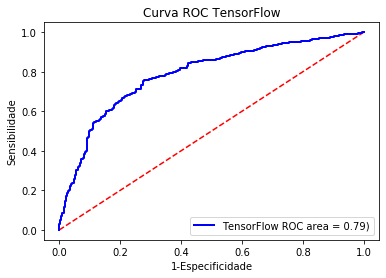

In [18]:
fig = plt.figure()
plt.xlabel('1-Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC TensorFlow')
plt.plot(fpr, tpr, color='blue', lw=2, label='TensorFlow ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()
fig.savefig('ROC_TensorFlow-weather.PNG')

## Avaliação exaustiva - Teste/Treino - Weather

In [ ]:
convergencia = False
auc_total = []
auc_num_componentes = []
media_anterior = 0
auc_divisao = []
numAucsComponentes = []
numAucsDivisao = []

for divisao in np.arange(0.1, 1, 0.1):
    print("DIVISAO DA BASE DE DADOS", divisao)

    
    for numComponentes in range(1,13):
        print(numComponentes)
        
        auc_componente = []
        media_anterior = 0
        qtd_iguais = 0
        
        pca_Tensor = PCA(n_components = numComponentes)
        pca_Tensor.fit(scaled_data)
        x_pca_Tensor = pca_Tensor.transform(scaled_data)
        
        convergencia = False
        print("COMPONENTE", numComponentes)
    
        while(not convergencia):
            
            X_train, X_test, y_train, y_test = aplicaKFoldAlterado(x_pca_Tensor, df_custumer_target, divisao)
            predictedprob = aplicaTensor(X_train, X_test, y_train, numComponentes)
           
            fpr, tpr, thresholds = roc_curve(y_test, predictedprob)
            roc_auc = auc(fpr, tpr)
            
            auc_componente.append(roc_auc)#FEITO
            media_aucs = round(sum(auc_componente) / len(auc_componente), 2)#feito
           
            if media_anterior == media_aucs:
                qtd_iguais = qtd_iguais + 1
            if qtd_iguais == 10:
                
                auc_num_componentes.append(media_aucs)#feito
                auc_total.append(auc_componente)
                convergencia = True
                
            media_anterior = media_aucs
            #print("Media Anterior", media_anterior)
            #print("QUANTIDADE", qtd_iguais)
            
    numAucsDivisao.append(numAucsComponentes)
    auc_divisao.append(auc_total)
    
    numAucsComponentes = []
    auc_total = []
    
    

## Mapa de calor - Tensorflow

In [ ]:
predictionsTensorflowAjustado.shape

In [ ]:
predictionsTensorflowAjustado =[]

for row in predictedprob:
    predictionsTensorflowAjustado.append(row[0])
predictionsTensorflowAjustado = np.asarray(predictionsTensorflowAjustado)

In [ ]:
predictions_auc =[]
for row in auc_divisao:
    predictions_auc.append(row[0])
predictions_auc = np.asarray(predictions_auc)

In [ ]:
def add(x):
    return x+1

In [ ]:
import seaborn as sns
fig = plt.figure(figsize = (12, 6))

df_divisao = pd.DataFrame(predictions_auc)
df_divisao.set_index(np.arange(1,10), inplace = True)
df_divisao.rename(add, axis='columns', inplace = True)
sns.heatmap(data = df_divisao)
plt.title("Assertividade Tensor Flow")
plt.savefig('assertividade_tensor_flow-divisao-numcomponentes-weather.png')